# 安徽安庆市项目
## 本地排放清单与MEIC比较
## `Compare local emis with MEIC`

---
*@author: Evan*\
*@date: 2023-09-27*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

In [2]:
leaq = pd.read_excel(datadir + 'step1_preliminary/count_emission.xlsx',sheet_name='LEAQ',index_col=0)
leaq

,SO2,NOx,CO,PM10,PM25,VOCs,NH3,BC,OC
Sectors,,,,,,,,,
Industry,2986.15,9529.24,63798.70,26934.29,12800.74,31771.78,493.76,432.72,1096.30
Transportation,556.78,19936.37,14276.16,24898.67,6590.48,3068.96,265.00,756.36,248.22
Power,1715.27,1773.88,16087.42,667.25,466.97,330.78,0.00,35.79,42.01
Residential,0.00,3.68,3.27,5712.35,4569.48,4021.93,1524.46,93.21,3198.64
Agriculture,0.00,0.00,3.00,7511.00,212.00,3015.00,25943.00,0.00,0.00


# 绝对值

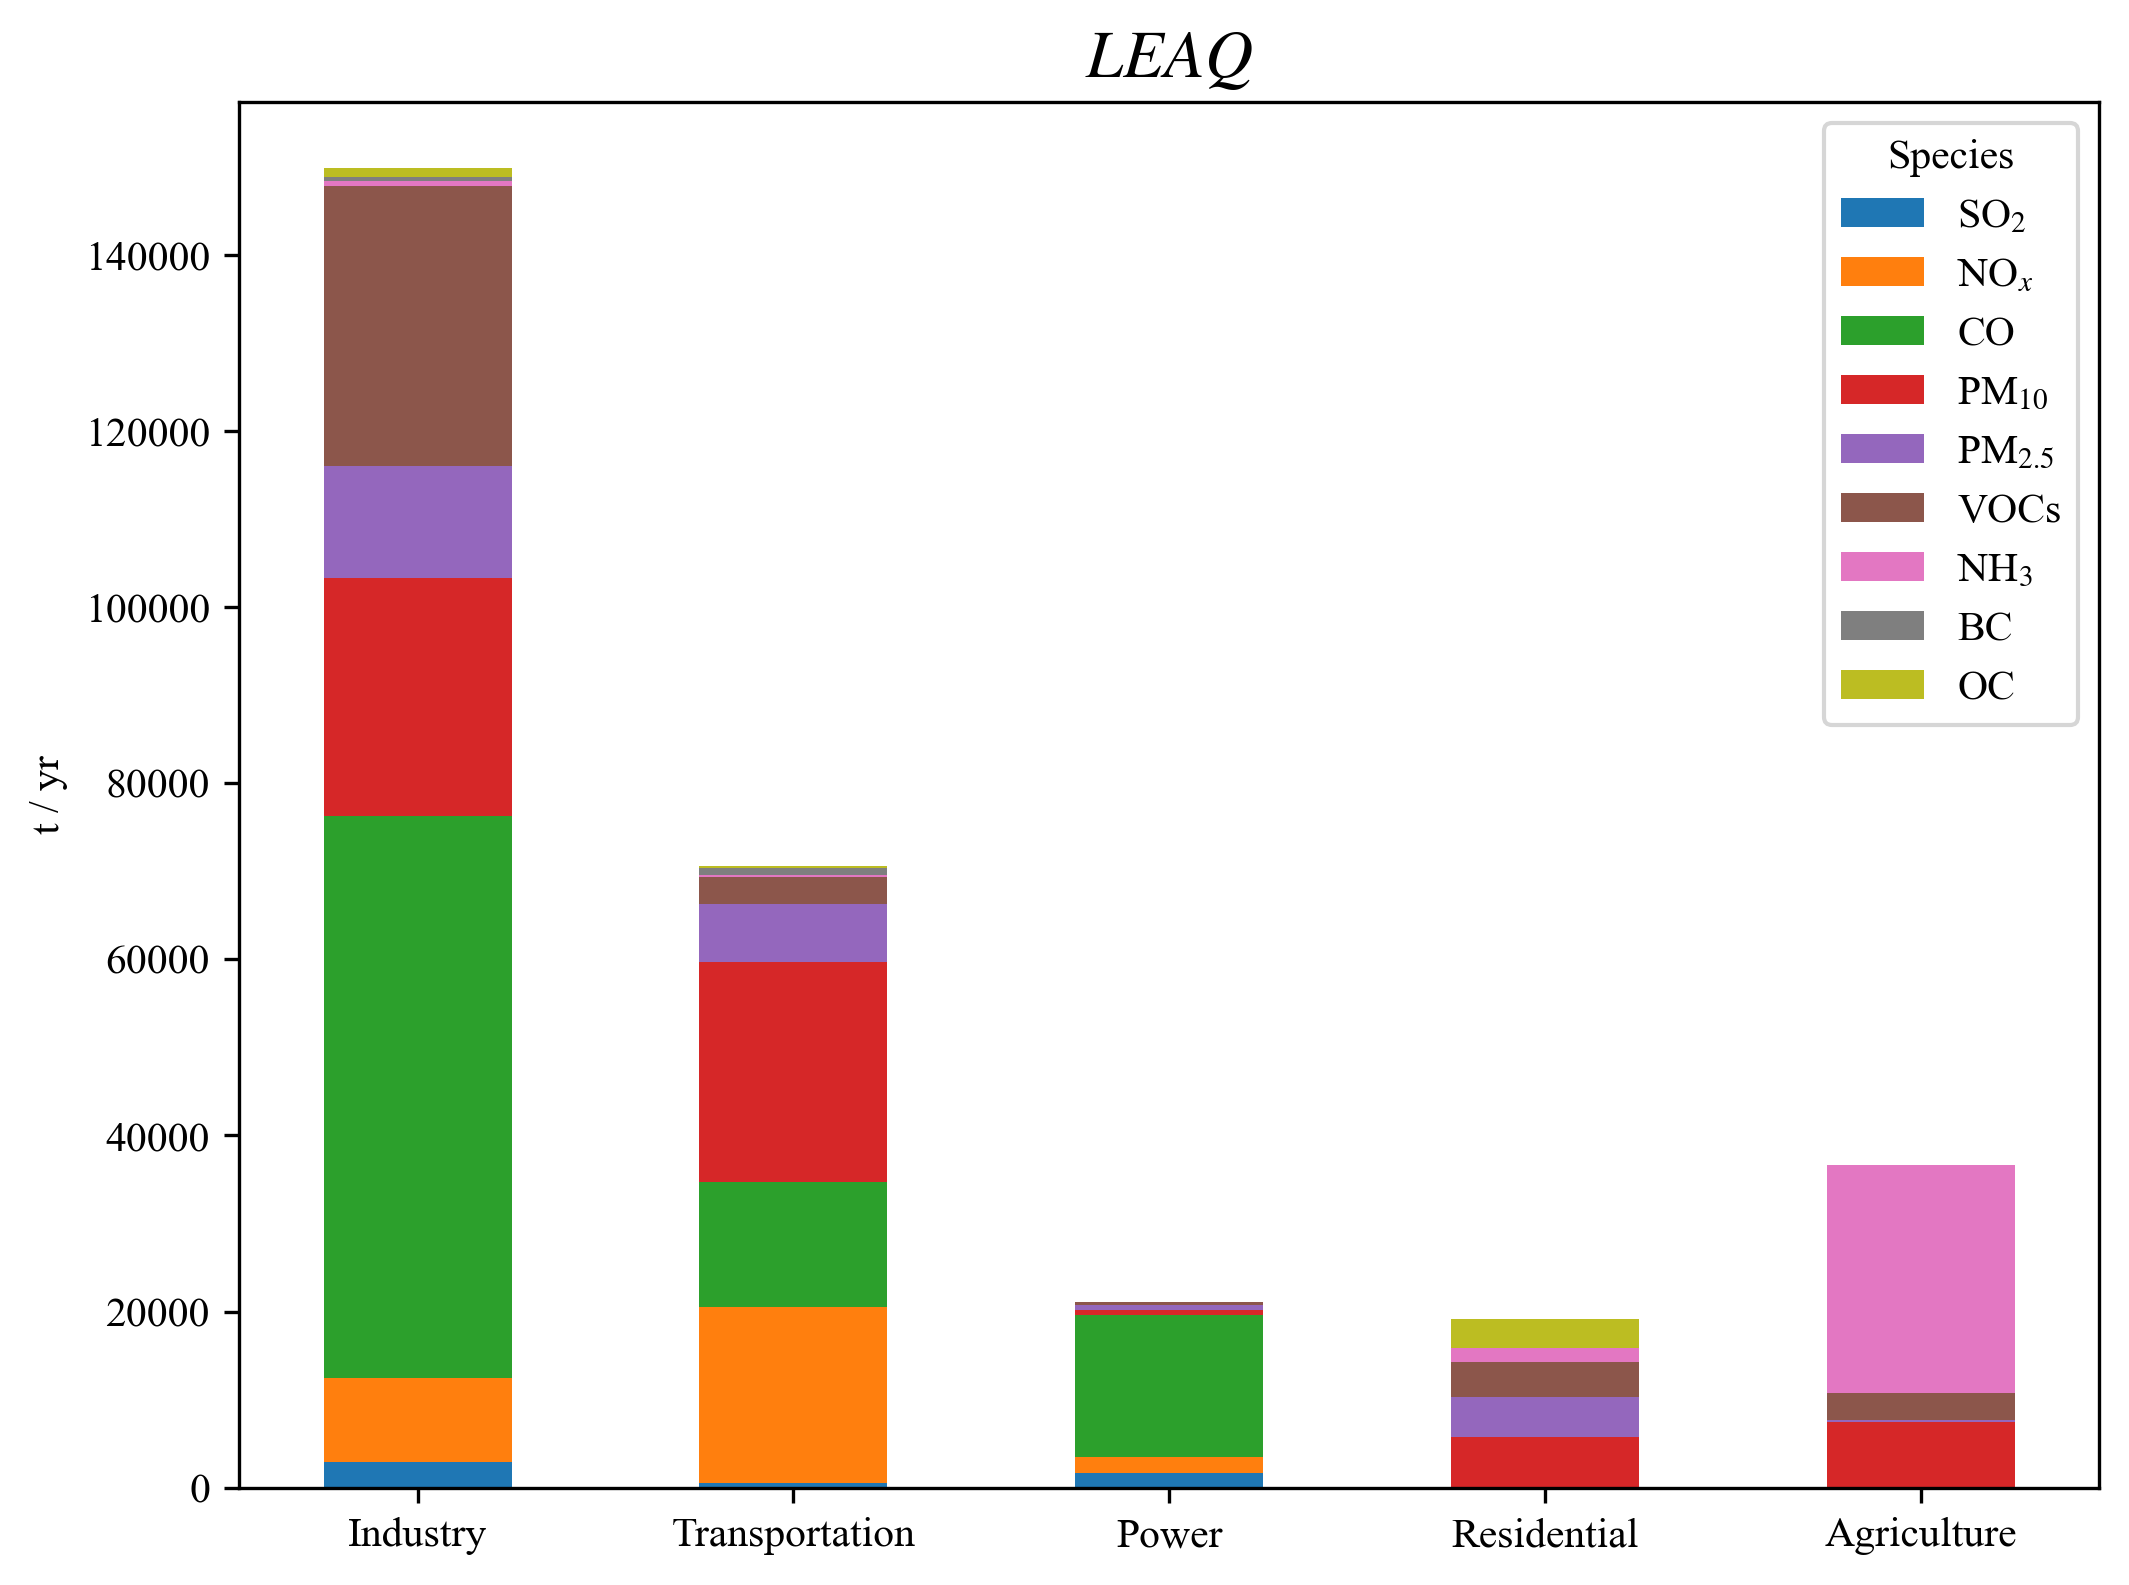

In [3]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

leaq_copy = leaq.copy()
bottom = [0] * len(leaq.index) # None
labels = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(leaq_copy.columns):
    if bottom is None:
        ax.bar(leaq_copy.index, leaq_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = leaq_copy[col]
    else:
        ax.bar(leaq_copy.index, leaq_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += leaq_copy[col]
ax.legend(title='Species')
ax.set_ylabel('t / yr')
ax.set_title('$LEAQ$',size=16,weight='bold')
plt.show()

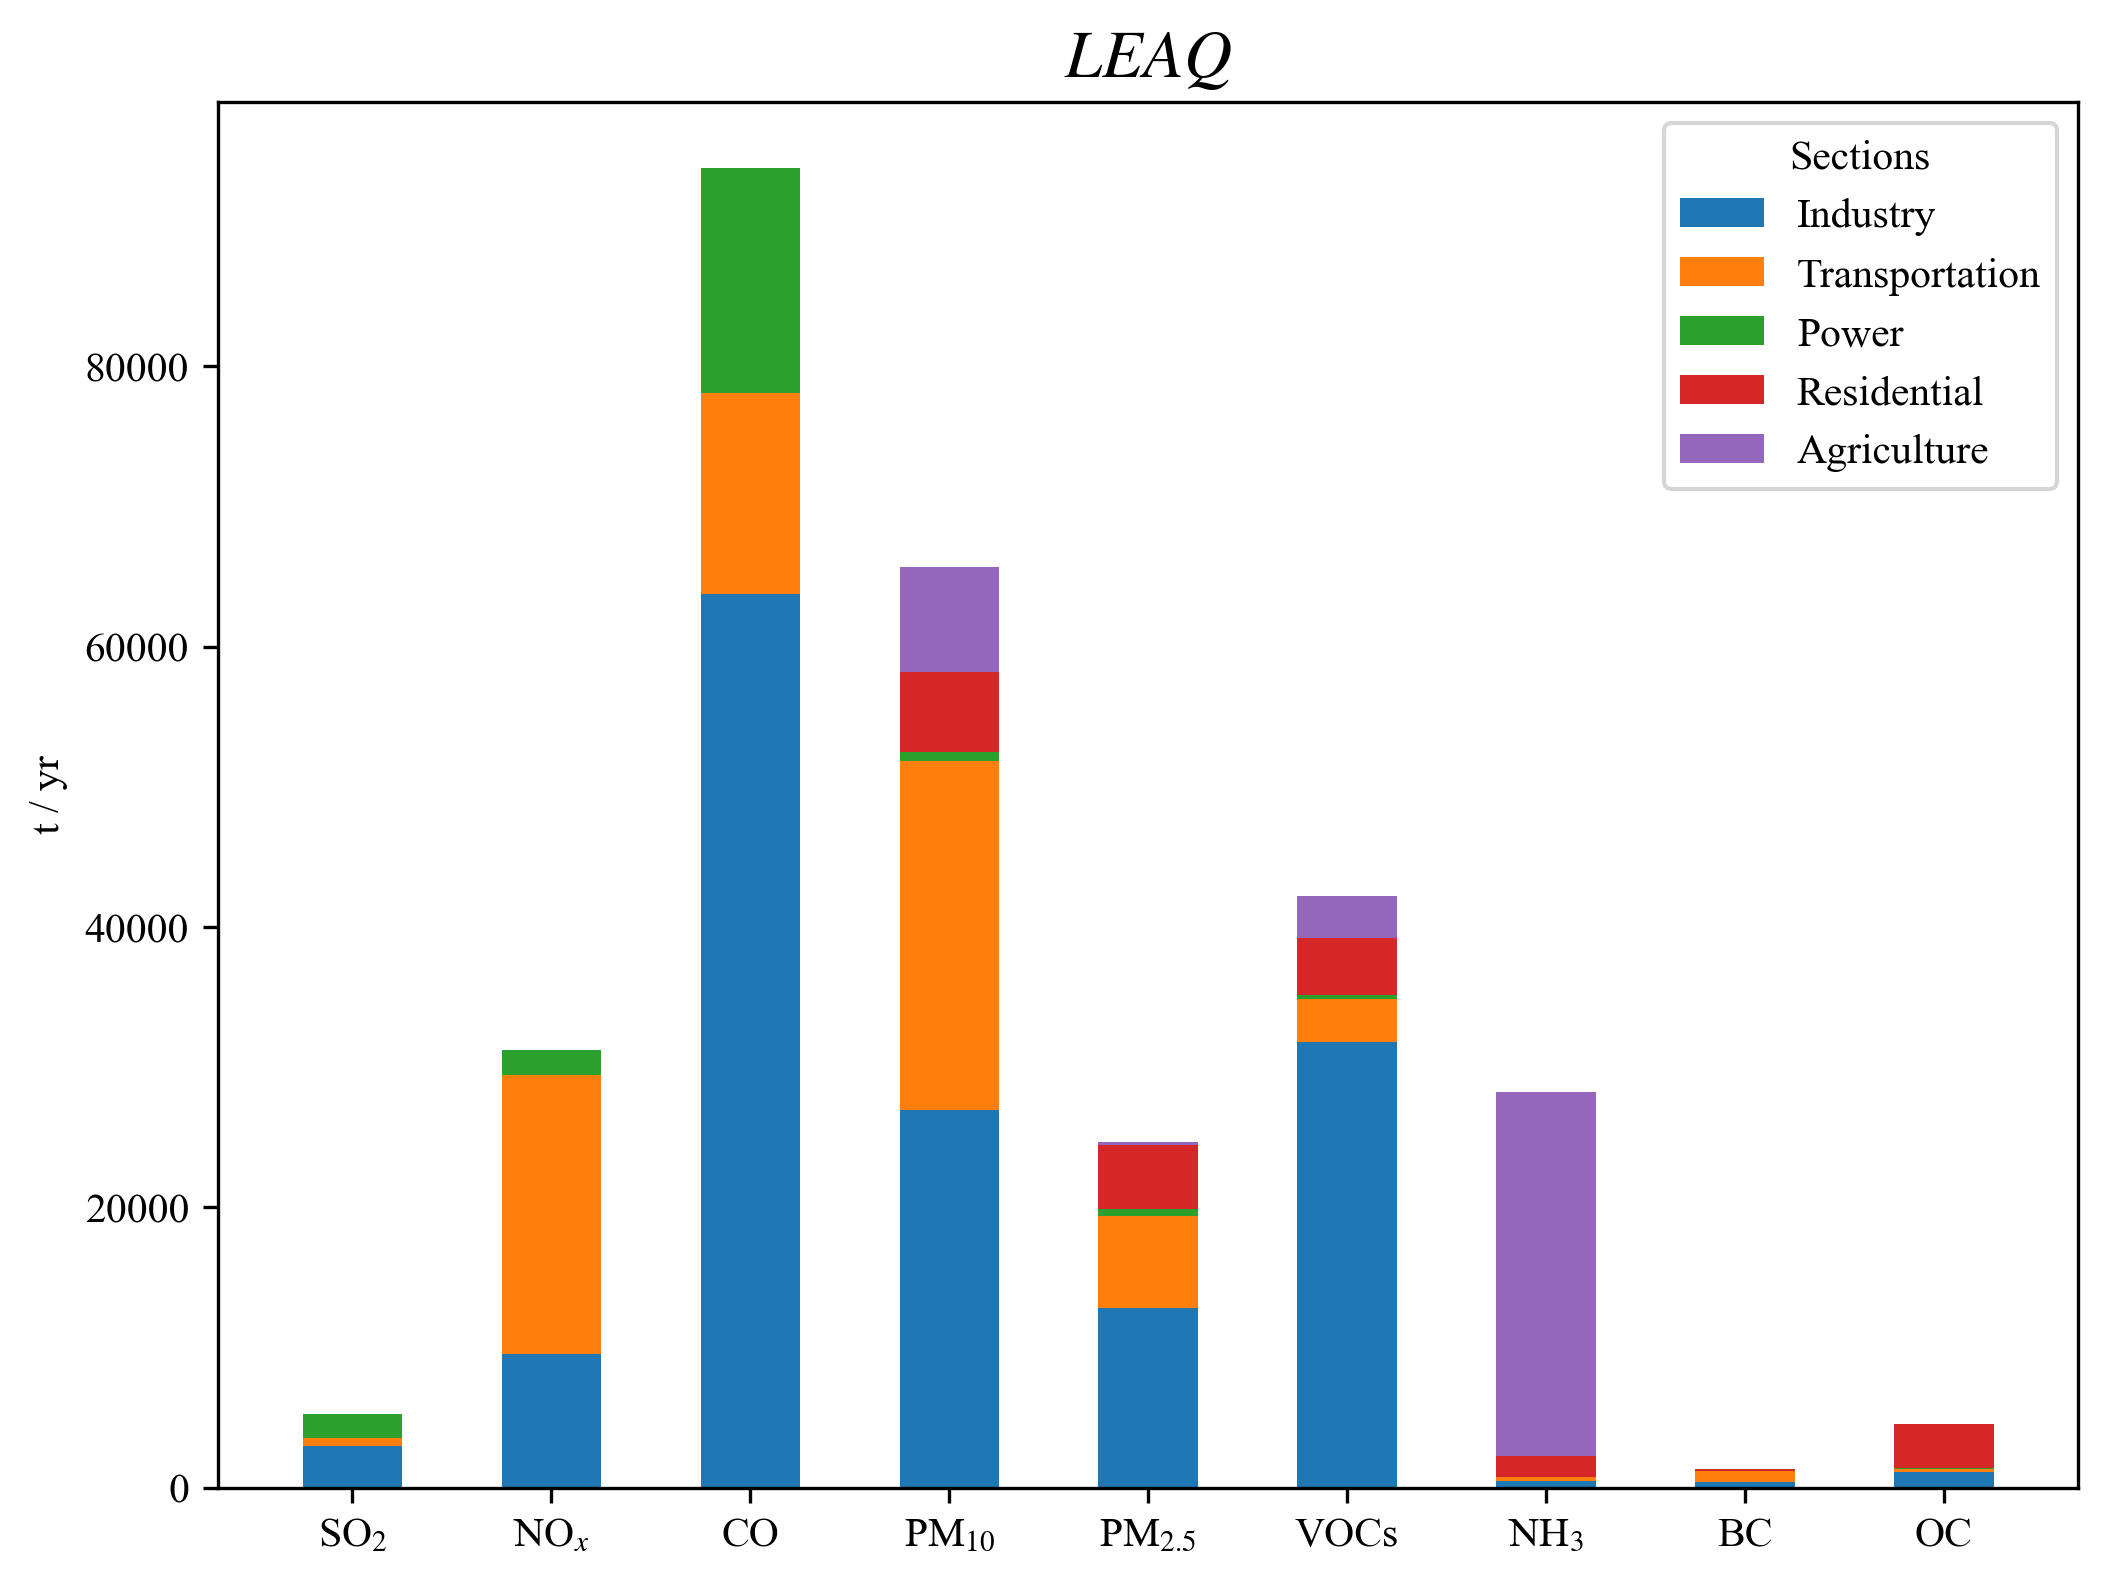

In [4]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

leaqT = leaq.T
leaqT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
leaqT_copy = leaqT.copy()
bottom = [0] * len(leaqT.index) # None
labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(leaqT_copy.columns):
    if bottom is None:
        ax.bar(leaqT_copy.index, leaqT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = leaqT_copy[col]
    else:
        ax.bar(leaqT_copy.index, leaqT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += leaqT_copy[col]
ax.legend(title='Sections')
ax.set_ylabel('t / yr')
ax.set_title('$LEAQ$',size=16,weight='bold')
plt.show()

# 占比

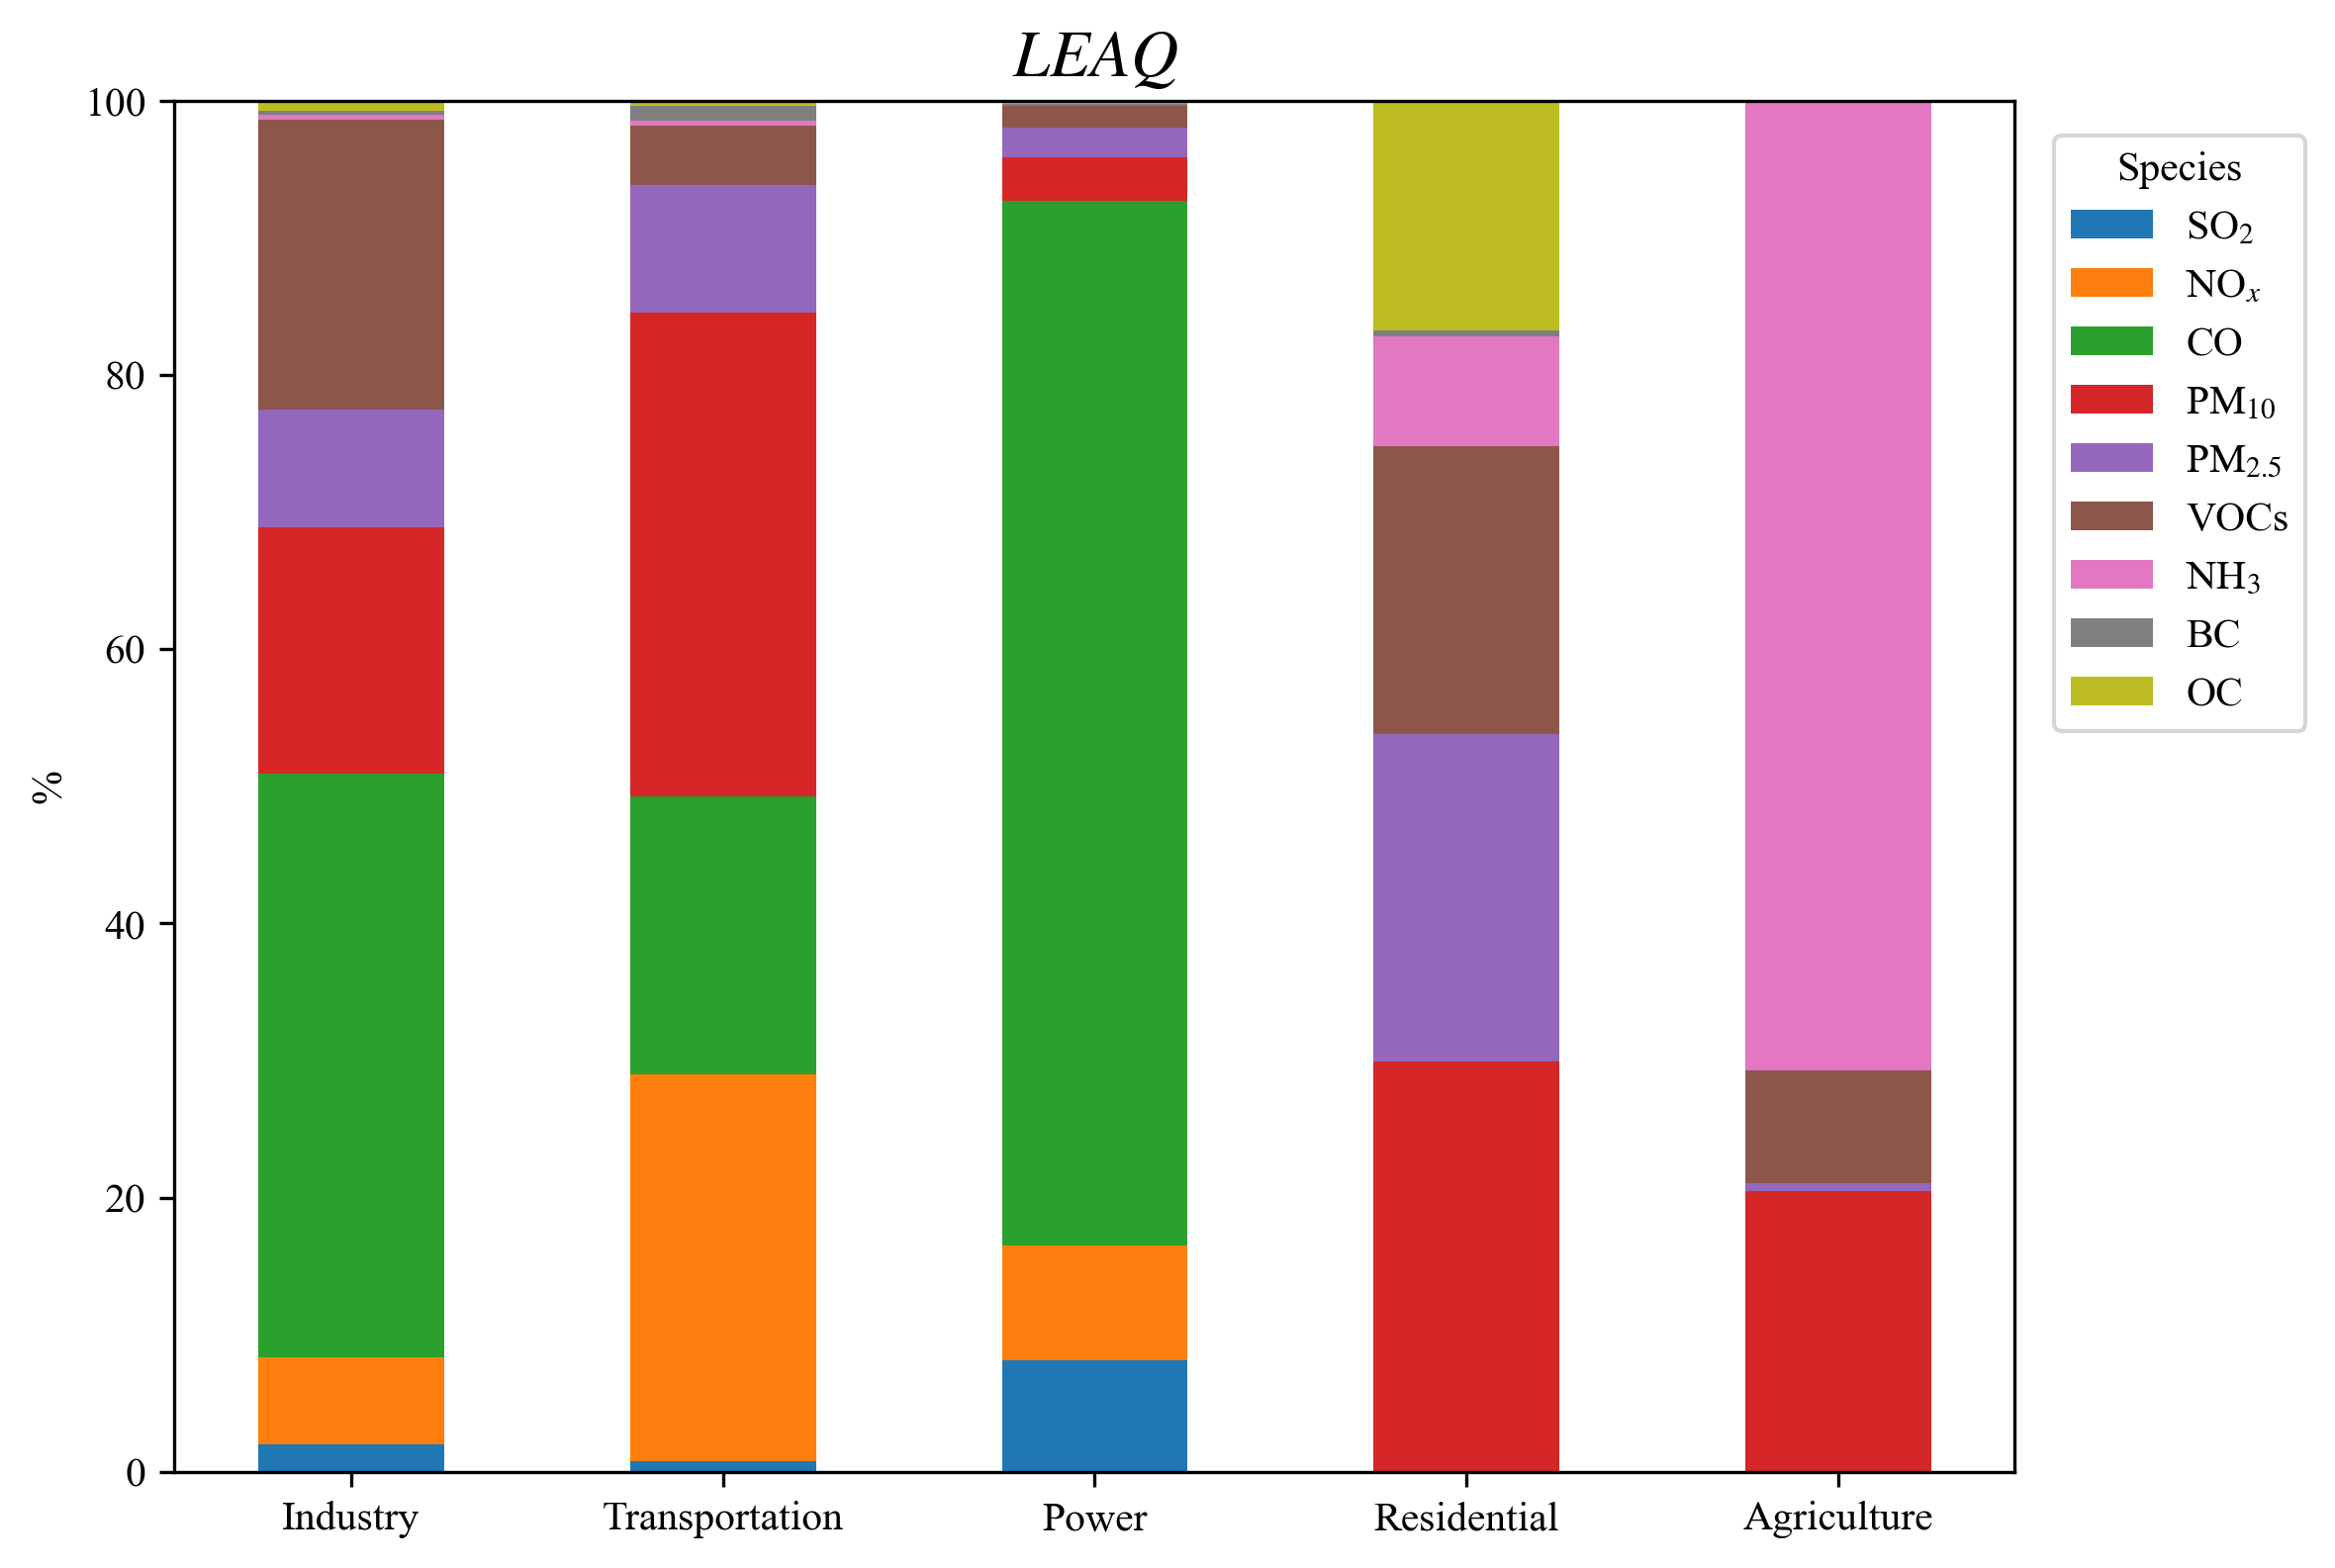

In [5]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

leaq_copy = leaq.copy()

# Calculate the total sum for each category
total_sum = leaq_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in leaq_copy.columns:
    leaq_copy[col] = (leaq_copy[col] / total_sum) * 100

bottom = [0] * len(leaq.index)  # Initialize bottom

labels = ['SO$_2$', 'NO$_x$', 'CO', 'PM$_{10}$', 'PM$_{2.5}$', 'VOCs', 'NH$_3$', 'BC', 'OC']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(leaq_copy.columns):
    if bottom is None:
        ax.bar(leaq_copy.index, leaq_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = leaq_copy[col]
    else:
        ax.bar(leaq_copy.index, leaq_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += leaq_copy[col]

ax.legend(title='Species',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$LEAQ$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()


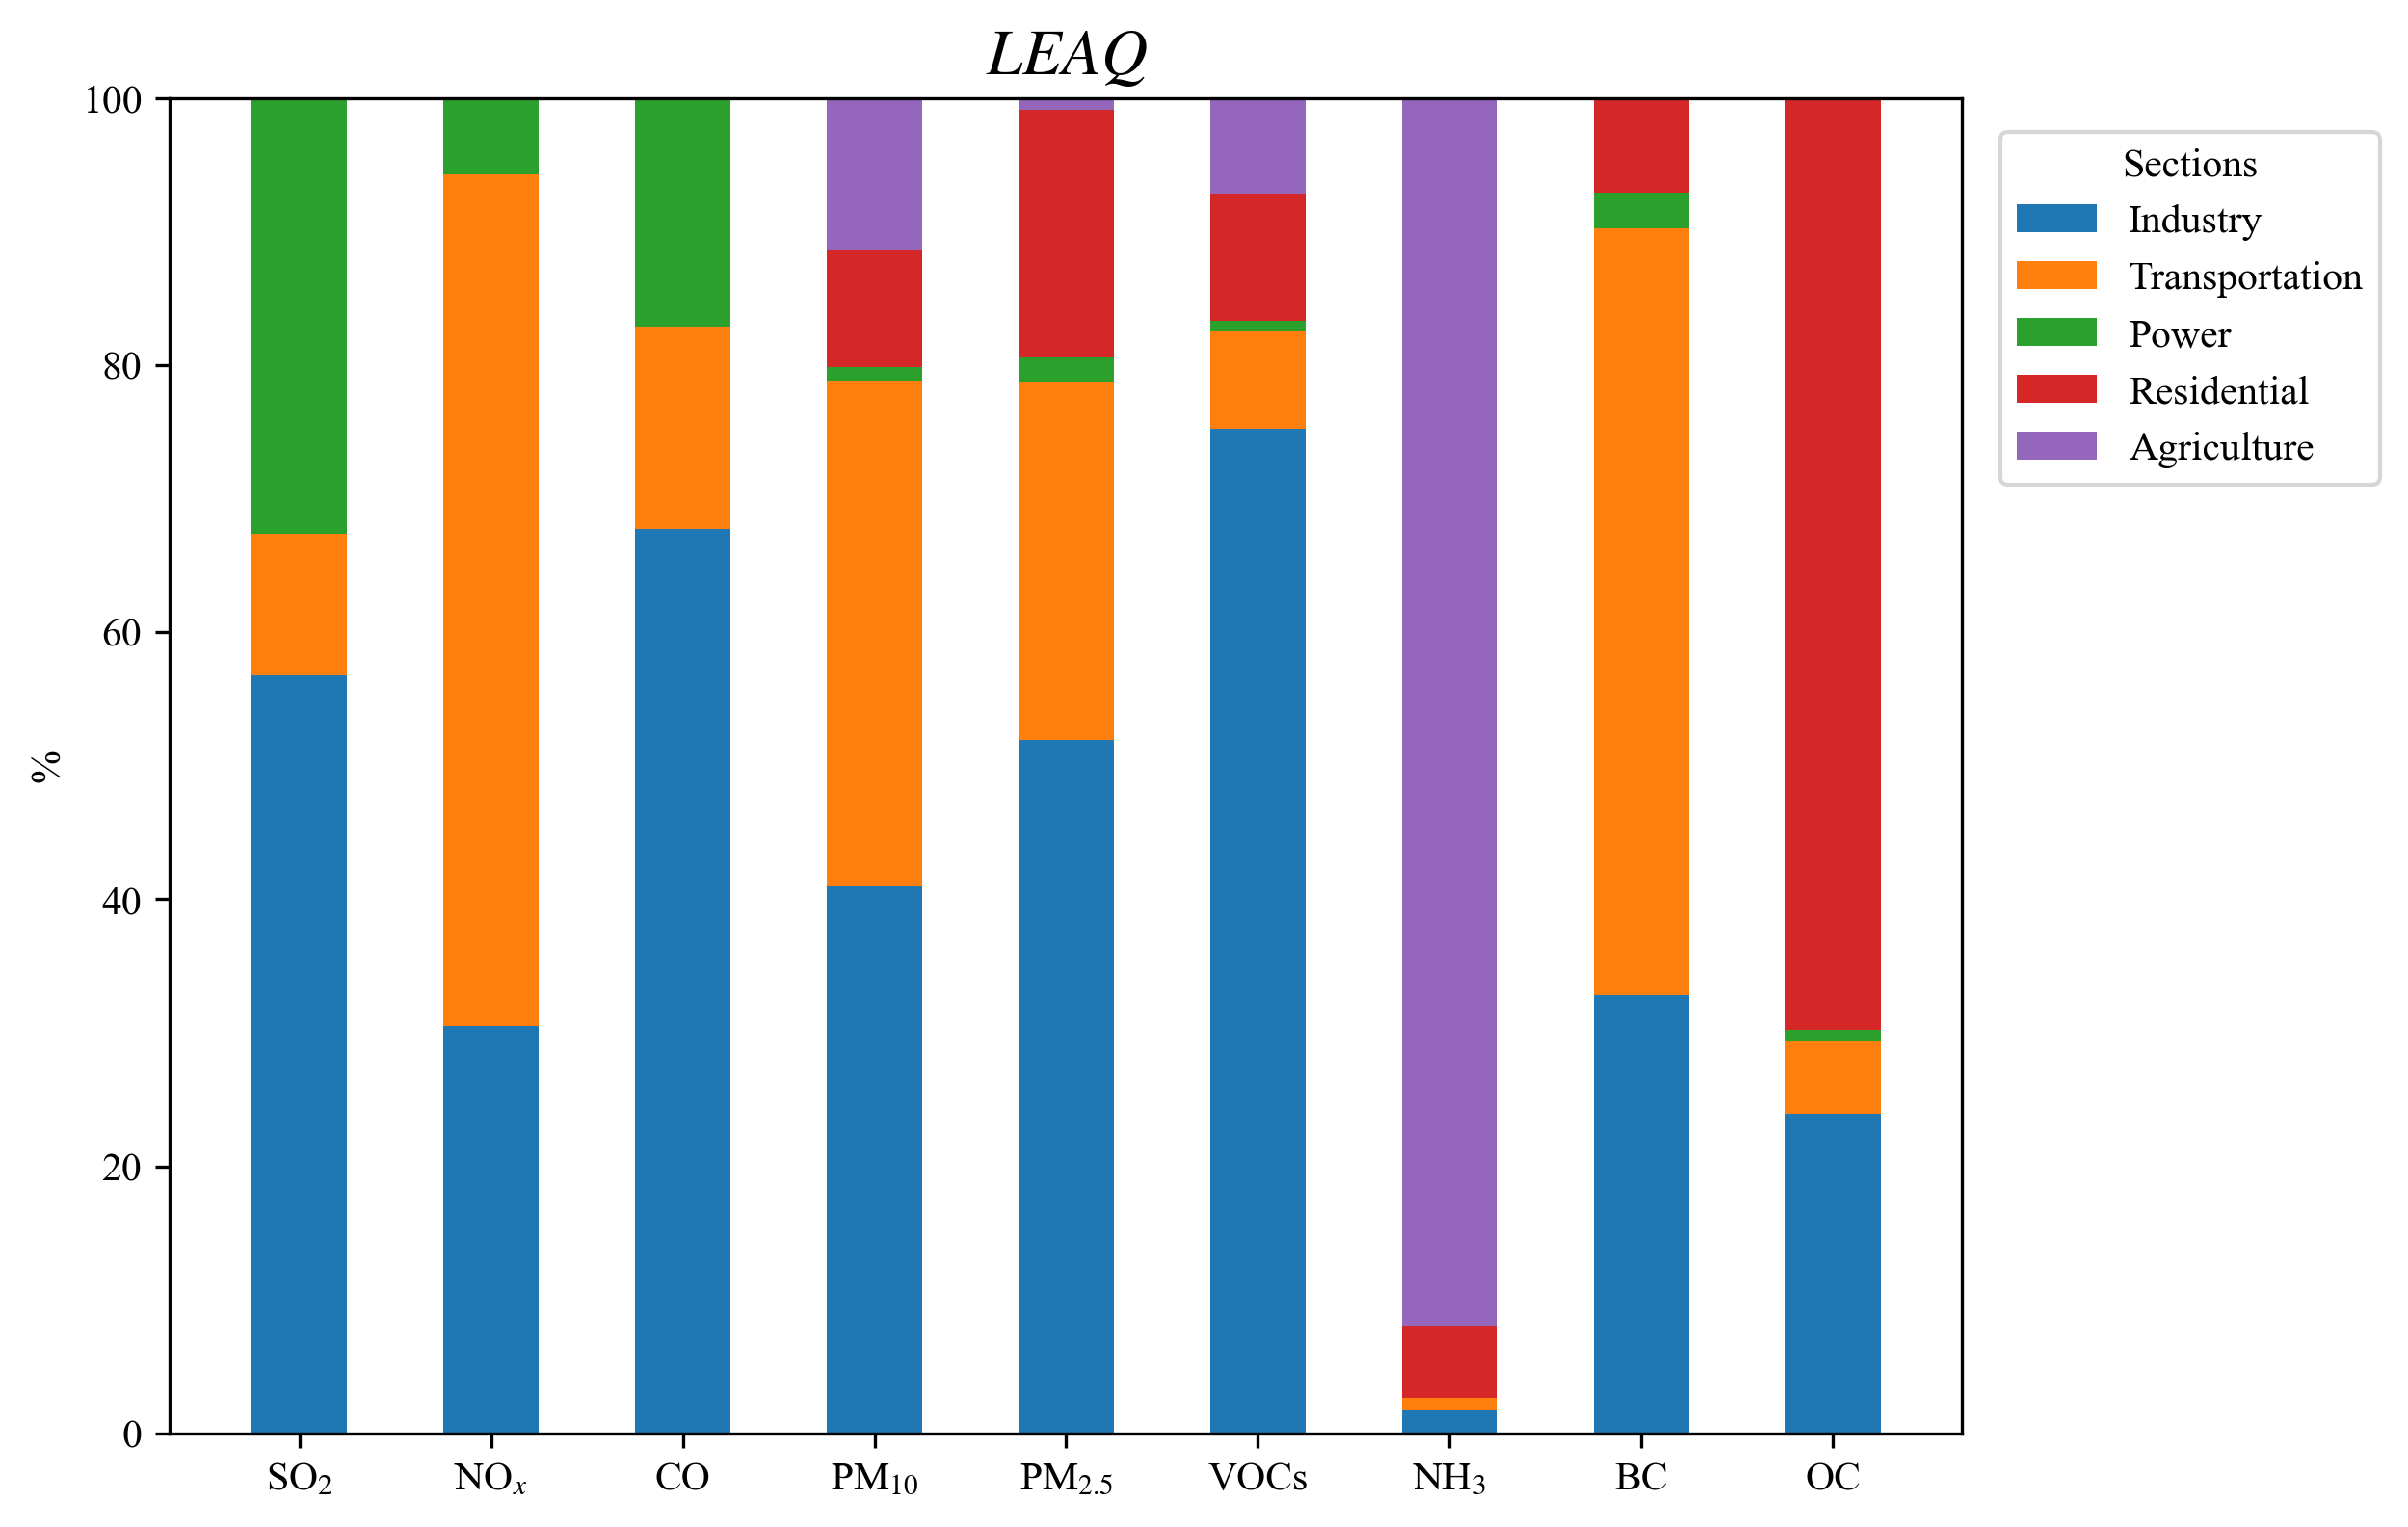

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

leaqT = leaq.T
leaqT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
leaqT_copy = leaqT.copy()

# Calculate the total sum for each category
total_sum = leaqT_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in leaqT_copy.columns:
    leaqT_copy[col] = (leaqT_copy[col] / total_sum) * 100

bottom = [0] * len(leaqT.index)  # Initialize bottom

labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(leaqT_copy.columns):
    if bottom is None:
        ax.bar(leaqT_copy.index, leaqT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = leaqT_copy[col]
    else:
        ax.bar(leaqT_copy.index, leaqT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += leaqT_copy[col]

ax.legend(title='Sections',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$LEAQ$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()
